In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
AUS_data = pd.read_csv("weatherAUS.csv")

In [5]:
AUS_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
AUS_data.shape

(145460, 23)

In [7]:
AUS_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

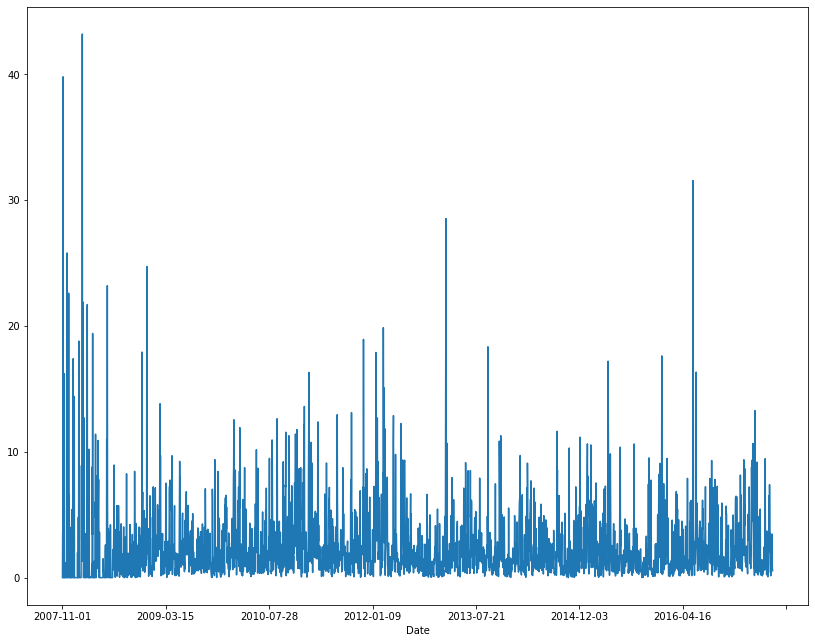

In [8]:
AUS_data.groupby(['Date'])['Rainfall'].mean().plot(figsize=(14,11))
plt.show()

In [10]:
AUS_data['Date'] = pd.to_datetime(AUS_data['Date'])
AUS_data['Year-Mon'] = [d.strftime("%Y-%m") for d in AUS_data['Date']]

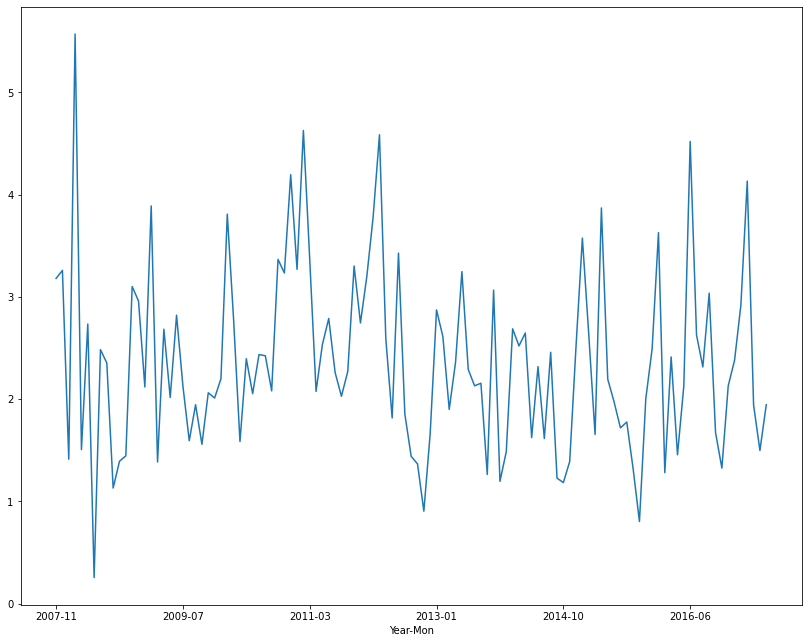

In [11]:
AUS_data.groupby(['Year-Mon'])['Rainfall'].mean().plot(figsize=(14,11))
plt.show()

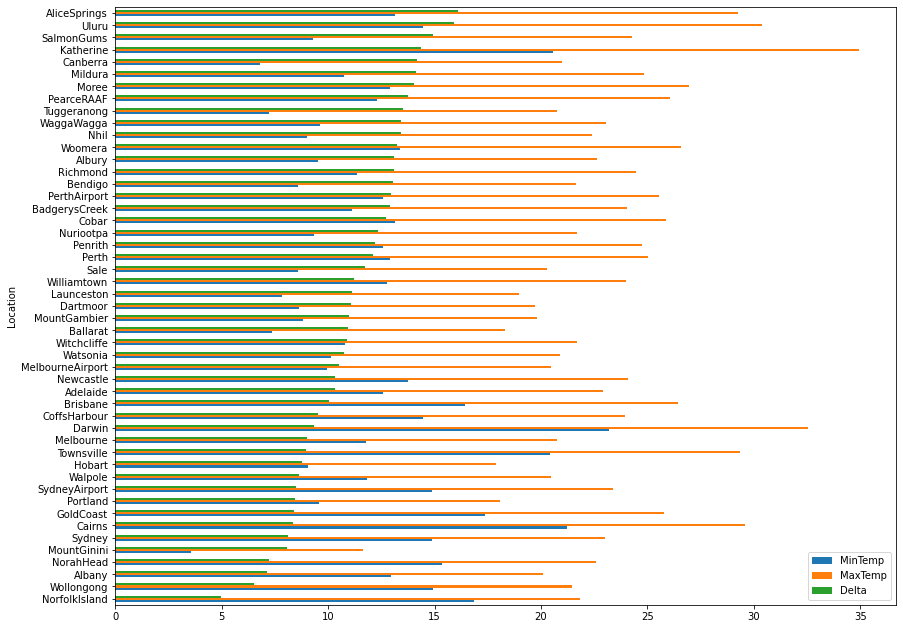

In [258]:
temperature_average = AUS_data.groupby(['Location']).mean()[['MinTemp', 'MaxTemp']]
temperature_average['Delta'] = temperature_average['MaxTemp'] - temperature_average['MinTemp']
temperature_average.sort_values(by='Delta', ascending=True).plot(kind='barh', figsize=(14,11))
plt.show()

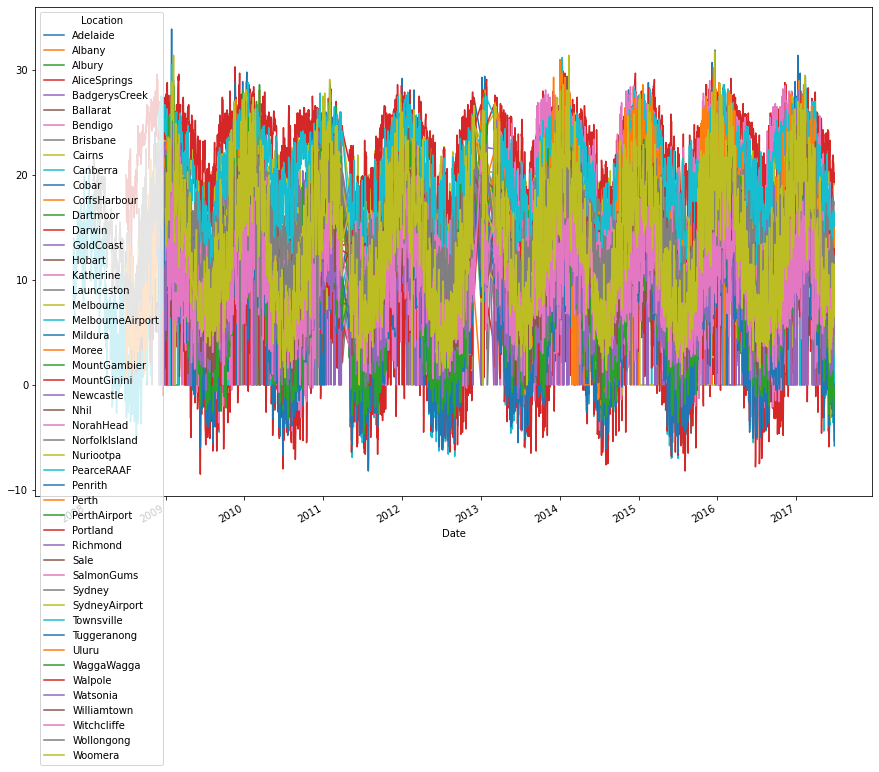

In [259]:
AUS_data.groupby(['Date', 'Location'])['MinTemp'].sum().unstack().plot(figsize=(15,10))
plt.show()

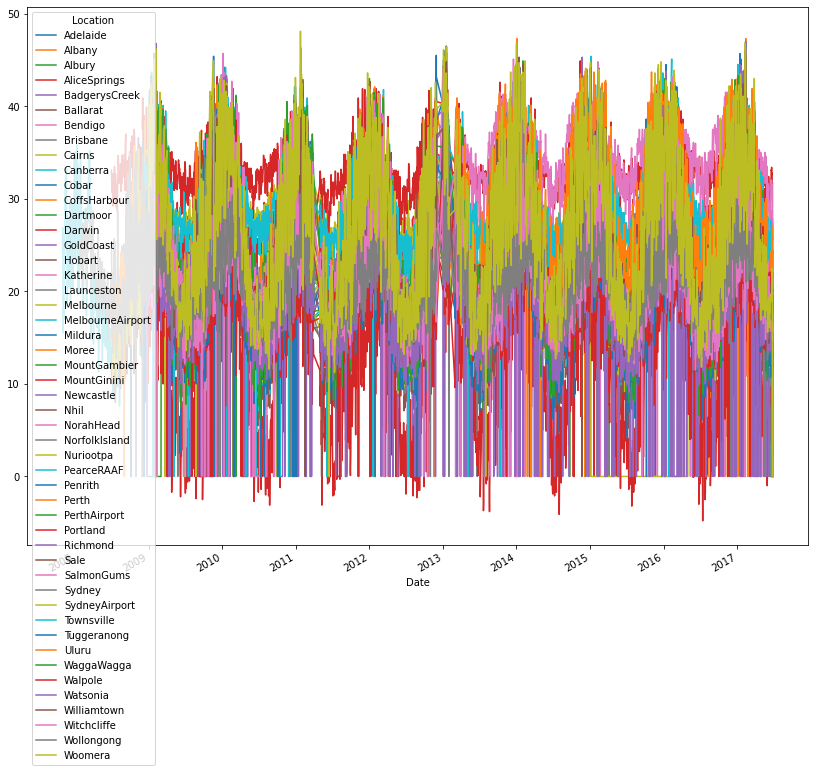

In [261]:
AUS_data.groupby(['Date', 'Location'])['MaxTemp'].sum().unstack().plot(figsize=(14,11))
plt.show()

In [13]:
#Australia: map coordinates
AUS_data['Latitude'] = ""
AUS_data['Longitude'] = ""
AUS_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year-Mon', 'Latitude',
       'Longitude'],
      dtype='object')

In [14]:
latitude=[]
for row in AUS_data['Location']:
    if row == 'Albury':
        latitude.append(-36.073730)
    elif row == 'CoffsHarbour':
        latitude.append(-30.296350)
    elif row == 'Newcastle':
        latitude.append(-32.926670)
    elif row == 'Sydney':
        latitude.append(-33.868820)
    elif row == 'WaggaWagga':
        latitude.append(-35.114750)
    elif row == 'Wollongong':
        latitude.append(-34.424179)
    elif row == 'Canberra':
        latitude.append(-35.282001)
    elif row == 'Ballarat':
        latitude.append(-37.549999)
    elif row == 'Bendigo':
        latitude.append(-36.757786)
    elif row == 'Melbourne':
        latitude.append(-37.840935)
    elif row == 'Portland':
        latitude.append(-38.346345)
    elif row == 'Brisbane':
        latitude.append(-27.470125)
    elif row == 'Cairns':
        latitude.append(-16.925491)
    elif row == 'GoldCoast':
        latitude.append(-28.016666)
    elif row == 'Townsville':
        latitude.append(-19.258965)
    elif row == 'Adelaide':
        latitude.append(-34.921230)
    elif row == 'Albany':
        latitude.append(-35.022778)
    elif row == 'Perth':
        latitude.append(-31.953512)
    elif row == 'Hobart':
        latitude.append(-42.880554)
    elif row == 'Launceston':
        latitude.append(-41.429825)
    elif row == 'AliceSprings':
        latitude.append(-23.700552)
    elif row == 'Darwin':
        latitude.append(-12.462827)
    elif row == 'Katherine':
        latitude.append(-14.46517)
    elif row == 'Uluru':
        latitude.append(-25.344490)
    else:
        latitude.append('Not Defined')
        

In [15]:
longitude=[]
for row in AUS_data['Location']:
    if row == 'Albury':
        longitude.append(146.913544)
    elif row == 'CoffsHarbour':
        longitude.append(153.115692)
    elif row == 'Newcastle':
        longitude.append(151.780014)
    elif row == 'Sydney':
        longitude.append(151.209290)
    elif row == 'WaggaWagga':
        longitude.append(147.369620)
    elif row == 'Wollongong':
        longitude.append(150.893555)
    elif row == 'Canberra':
        longitude.append(149.128998)
    elif row == 'Ballarat':
        longitude.append(143.850006)
    elif row == 'Bendigo':
        longitude.append(144.278702)
    elif row == 'Melbourne':
        longitude.append(144.946457)
    elif row == 'Portland':
        longitude.append(141.60421)
    elif row == 'Brisbane':
        longitude.append(153.021072)
    elif row == 'Cairns':
        longitude.append(145.754120)
    elif row == 'GoldCoast':
        longitude.append(153.399994)
    elif row == 'Townsville':
        longitude.append(146.816956)
    elif row == 'Adelaide':
        longitude.append(138.599503)
    elif row == 'Albany':
        longitude.append(117.881386)
    elif row == 'Perth':
        longitude.append(115.857048)
    elif row == 'Hobart':
        longitude.append(147.324997)
    elif row == 'Launceston':
        longitude.append(147.157135)
    elif row == 'AliceSprings':
        longitude.append(133.882675)
    elif row == 'Darwin':
        longitude.append(130.841782)
    elif row == 'Katherine':
        longitude.append(132.26347)
    elif row == 'Uluru':
        longitude.append(131.035431)
    else:
        longitude.append('Not Defined')

In [16]:
#add geographic location
AUS_data['Latitude'] = latitude
AUS_data['Longitude'] = longitude

In [17]:
#day, month, year
AUS_data['day'] = AUS_data['Date'].dt.day
AUS_data['month'] = AUS_data['Date'].dt.month
AUS_data['year'] = AUS_data['Date'].dt.year

In [18]:
#average rainfall per month 
average_rainfall_aus = AUS_data.groupby(['Location','month','Latitude','Longitude']).Rainfall.mean().reset_index()
average_rainfall_aus.tail(12)

,Location,month,Latitude,Longitude,Rainfall
576,Woomera,1,Not Defined,Not Defined,0.665468
577,Woomera,2,Not Defined,Not Defined,0.784545
578,Woomera,3,Not Defined,Not Defined,0.350538
579,Woomera,4,Not Defined,Not Defined,0.773529
580,Woomera,5,Not Defined,Not Defined,0.477061
581,Woomera,6,Not Defined,Not Defined,0.506792
582,Woomera,7,Not Defined,Not Defined,0.389113
583,Woomera,8,Not Defined,Not Defined,0.364516
584,Woomera,9,Not Defined,Not Defined,0.419167
585,Woomera,10,Not Defined,Not Defined,0.348387


Text(0.5, 1.0, 'Dispersion of Rainfall in Australian Cities')

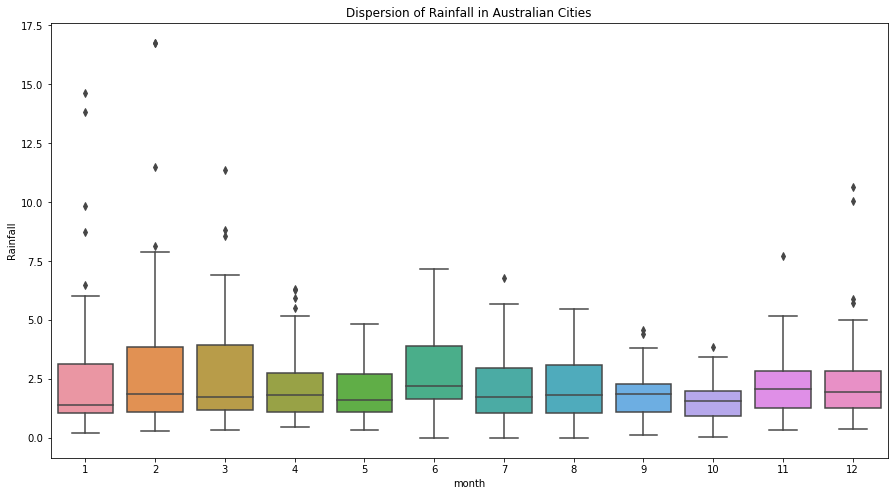

In [19]:
#boxplot Plot
plt.figure(figsize=(15,8))
sns.boxplot(x='month',y='Rainfall',data=average_rainfall_aus)

plt.title("Dispersion of Rainfall in Australian Cities")


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

[Text(0.5, 0, 'MinTemp'),
 Text(1.5, 0, 'MaxTemp'),
 Text(2.5, 0, 'Rainfall'),
 Text(3.5, 0, 'Evaporation'),
 Text(4.5, 0, 'Sunshine'),
 Text(5.5, 0, 'WindGustSpeed'),
 Text(6.5, 0, 'WindSpeed9am'),
 Text(7.5, 0, 'WindSpeed3pm'),
 Text(8.5, 0, 'Humidity9am'),
 Text(9.5, 0, 'Humidity3pm'),
 Text(10.5, 0, 'Pressure9am'),
 Text(11.5, 0, 'Pressure3pm'),
 Text(12.5, 0, 'Cloud9am'),
 Text(13.5, 0, 'Cloud3pm'),
 Text(14.5, 0, 'Temp9am'),
 Text(15.5, 0, 'Temp3pm'),
 Text(16.5, 0, 'day'),
 Text(17.5, 0, 'month'),
 Text(18.5, 0, 'year')]

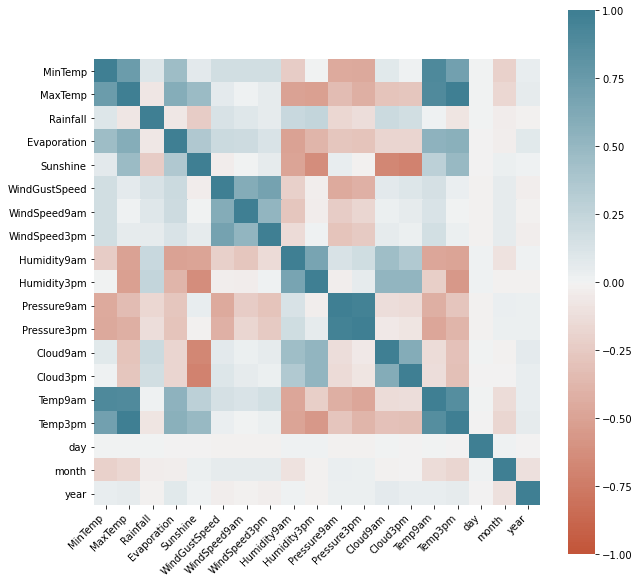

In [21]:
#correlation of variables: correlation diagram
fig, ax = plt.subplots(figsize=(10,10))
corr = AUS_data.corr()

ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [22]:
#cotegorical variables into continous variables by using label encoder
categorical_con = [x for x in AUS_data.columns if AUS_data[x].dtype == 'object']

for name in categorical_con:
    enc = LabelEncoder()
    enc.fit(list(AUS_data[name].values.astype('str')) + list(AUS_data[name].values.astype('str')))
    AUS_data[name] = enc.transform(AUS_data[name].values.astype('str'))

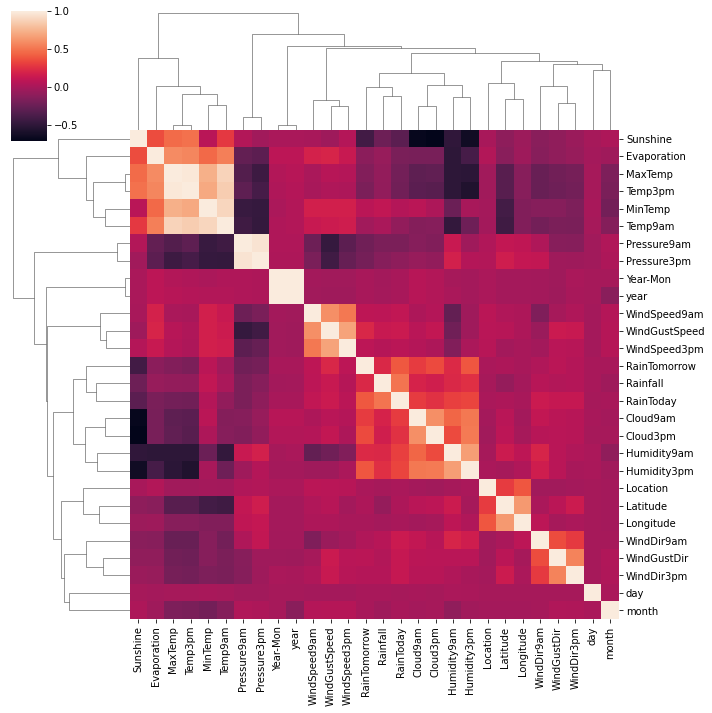

In [23]:
sns.clustermap(AUS_data.corr())
plt.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import LSTM

# Predicting Using Previous data

In [76]:
def Timeseries_to_supervised(AUS_data, n_in=1, n_out=1, dropnan=True):
    number_varibles = 1 if type(AUS_data) is list else AUS_data.shape[1]
    df = pd.DataFrame(AUS_data)
    colums, list_names = list(), list()
    for i in range(n_in, 0, -1):
        colums.append( AUS_data.shift(i))
        list_names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        colums.append( AUS_data.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            list_names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]   
    agg = pd.concat(colums, axis=1)
    agg.columns = list_names
    if dropingnan:
        agg.dropingnan(inplace=True)
    return agg

In [77]:
def forcasting_city(AUS_data, city, groupby='Date'):
    
    AUS_data = AUS_data.loc[ AUS_data['Location'] == city]
    
    catigorical_f = [x for x in  AUS_data.columns if  AUS_data[x].dtype == 'object']

    for name in catigorical_f:
        ec = preproces
        sing.LabelEncoder()
        ec.fit(list(AUS_data[name].values.astype('str')) + list(AUS_data[name].values.astype('str')))
        AUS_data[name] = ec.transform(AUS_data[name].values.astype('str'))

In [81]:
combi_data =  AUS_data.groupby('Date').mean()
combi_data['RainfallPred'] = combi_data['Rainfall'].shift()
combi_data.drop(['Rainfall'], axis=1, inplace=True) 
lstm = combi_data.values
lstm = lstm.astype('float32')
refra = combi_data
refra.dropna(inplace=True)
colum_name = refra.columns    
scaler_m = MinMaxScaler(feature_range=(-1, 1))
refra = scaler_m.fit_transform(refra)
refra= pd.DataFrame(refra, columns=colum_name)


In [84]:
values_r = refra.values
predicting_period = np.round(len(values_r)*0.8, 0).astype(int)
train = values_r[:predicting_period, :]
test = values_r[predicting_period:, :]

In [85]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape the input samples in 3d 
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [86]:
# NETWORK Layers
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer='adam')
# fit network     
history = model_lstm.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=0, shuffle=False)


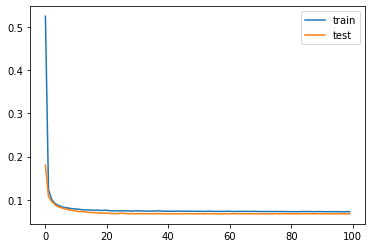

In [87]:
 # plot history     
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [88]:
yhat_sigmoid = model_lstm.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))


In [91]:
  
inv_yhat_sigmoid = np.concatenate((test_X[:, 0:], yhat_sigmoid), axis=1)
inv_yhat_sigmoid = scaler_m.inverse_transform(inv_yhat_sigmoid)
inv_yhat_sigmoid = inv_yhat_sigmoid[:,-1]

In [92]:
# invert scaling for actual     
test_y = test_y.reshape((len(test_y), 1))
inverse_y = np.concatenate((test_X[:,0:], test_y), axis=1)
inverse_y = scaler_m.inverse_transform(inverse_y)
inverse_y = inverse_y[:,-1]

In [94]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(inverse_y, inv_yhat_sigmoid)

In [96]:
# calculate RMSE     
RMSE = np.sqrt(mean_squared_error(inverse_y, inv_yhat_sigmoid))
RMSE_title = 'Test RMSE: %.3f' % RMSE

In [97]:
MSE

6.489267373074514

In [98]:
RMSE_title

'Test RMSE: 2.547'

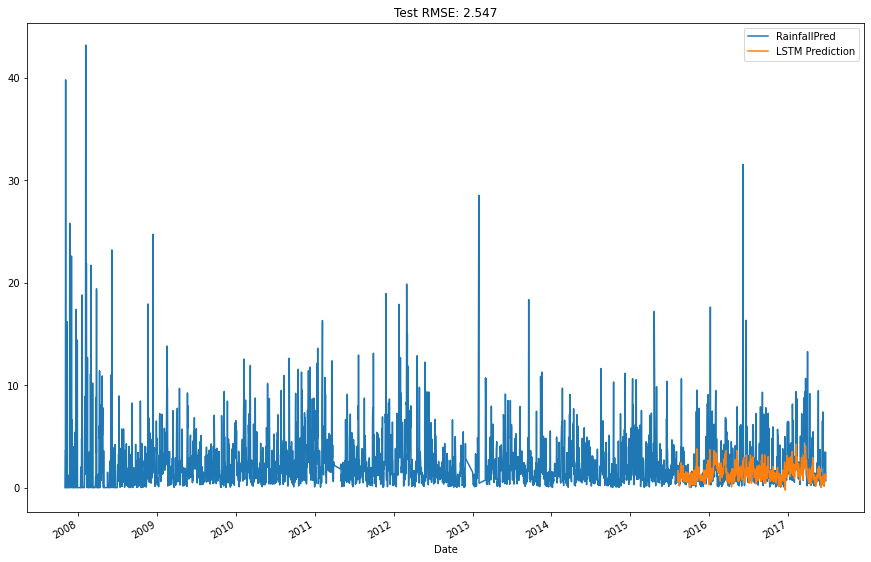

In [101]:
lstm_predictions = [np.nan for _ in range(0,len(train_X))]
combi_data['LSTM Prediction'] = lstm_predictions + list(inv_yhat_sigmoid)
combi_data[['RainfallPred', 'LSTM Prediction']].plot( figsize=(15,10), title=RMSE_title)
plt.show()

# Predicting using current data

In [230]:
def run_preds_supervised( AUS_data, predicting_period, groupby='Date'): 
    
    combi_data = AUS_data.groupby([groupby]).mean()
    combi_data.drop(['Rainfall'], axis=1, inplace=True)
    combi_data.dropna(inplace=True)
    lstm = combined_df.values                       
    lstm = lstm.astype('float32')
    
    refra = Timeseries_to_supervised(lstm, 1, 1)

    colum_name = refra.columns


In [231]:
scaler_m = MinMaxScaler(feature_range=(-1, 1))
refra = scaler_m.fit_transform(reframed)
refra = pd.DataFrame(refra, columns=colum_name)

In [232]:
# split into train and test sets# split     
values_r = refra.values
train = values[:forecast_period, :]
test = values[forecast_period:, :]

In [233]:
# split into input and outputs     
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [234]:
  # reshape input to be 3D [samples, timesteps, features]     
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [235]:
# NETWORK
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer='adam')
# fit network     
history = model_lstm.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=0, shuffle=False)

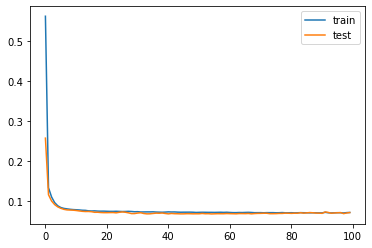

In [236]:
# plot history     
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
    

In [237]:
yhat_sigmoid = model_lstm.predict(test_X)

In [238]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [239]:
  
inv_yhat_sigmoid = np.concatenate((test_X[:, 0:], yhat_sigmoid), axis=1)
inv_yhat_sigmoid = scaler.inverse_transform(inv_yhat_sigmoid)
inv_yhat_sigmoid = inv_yhat_sigmoid[:,-1]

In [240]:
# invert scaling for actual     
test_y = test_y.reshape((len(test_y), 1))
inverse_y = np.concatenate((test_X[:,0:], test_y), axis=1)
inverse_y = scaler.inverse_transform(inverse_y)
inverse_y = inverse_y[:,-1]

In [241]:
from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(inverse_y, inv_yhat_sigmoid)

In [242]:
# calculate RMSE     
RMSE = np.sqrt(mean_squared_error(inverse_y, inv_yhat_sigmoid))
RMSE_title1 = 'Test RMSE: %.3f' % RMSE

In [243]:
RMSE_title1

'Test RMSE: 0.113'

In [244]:
MSE1

0.012837907356491263

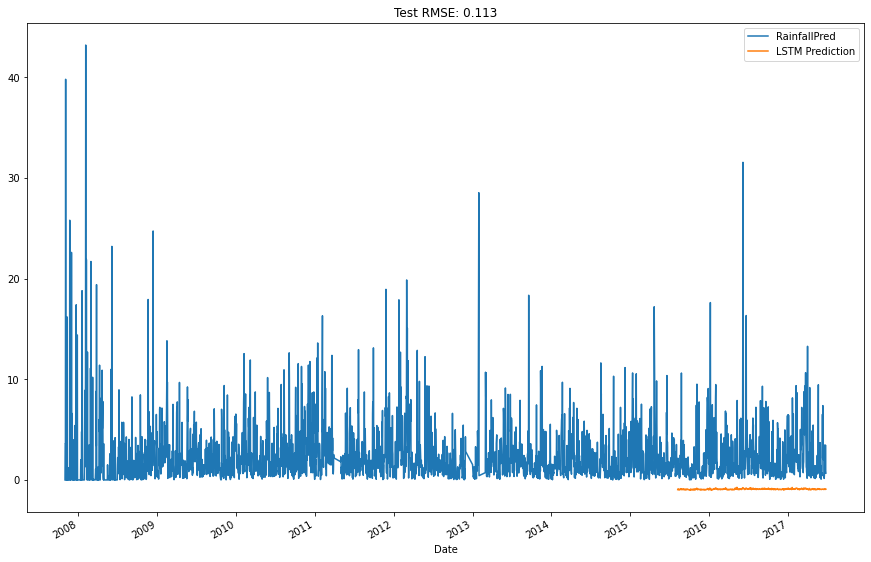

In [246]:
lstm_predictions = [np.nan for _ in range(0,len(train_X))]
combined_df['LSTM Prediction'] = lstm_predictions + list(inv_yhat)
combined_df[['RainfallPred', 'LSTM Prediction']].plot( figsize=(15,10), title=RMSE_title1)
plt.show()

In [15]:
from keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [16]:
data = pd.read_csv("weatherAUS.csv")

In [17]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
#importing categorical library int are chnaged to categorical and exploring the length of date objects
lengths_date = data["Date"].apply(str).str.replace(',', '')
lengths_date.value_counts()

2014-09-24    49
2013-05-13    49
2015-05-22    49
2014-04-04    49
2014-11-01    49
              ..
2008-01-19     1
2007-12-12     1
2008-01-10     1
2008-01-07     1
2008-01-04     1
Name: Date, Length: 3436, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [20]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

#the months and days in a cyclic continuous feature to use this data in neural network we prefer to use like this. 

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

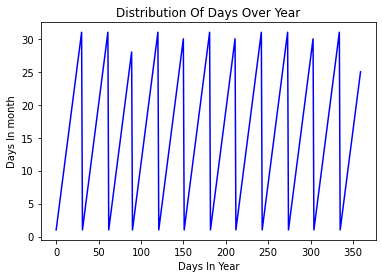

In [21]:
#showing rough calender
section = data[:360] 
calender = section["day"].plot(color="blue")
calender.set_title("Distribution Of Days Over Year")
calender.set_ylabel("Days In month")
calender.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

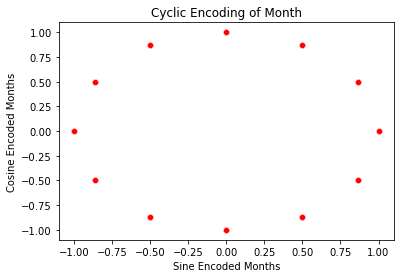

In [22]:
cyc_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="red")
cyc_month.set_title("Cyclic Encoding of Month")
cyc_month.set_ylabel("Cosine Encoded Months")
cyc_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

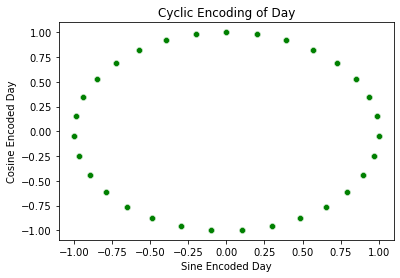

In [23]:
cyc_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="green")
cyc_day.set_title("Cyclic Encoding of Day")
cyc_day.set_ylabel("Cosine Encoded Day")
cyc_day.set_xlabel("Sine Encoded Day")

In [24]:
#categorical values
v = (data.dtypes == "object")
catlist_col = list(v[v].index)

In [25]:
# getting null values in categorical
for i in catlist_col:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [26]:
# Filling null values

for i in catlist_col:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [27]:
#numeric variables
N = (data.dtypes == "float64")
numeric_cols = list(N[N].index)

print("Numeric variables:")
print(numeric_cols)

Numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [39]:
weather_features["RainTomorrow"] = tar

#Dropping with outlier

weather_features = weather_features[(weather_features["MinTemp"]<2.3)&(weather_features["MinTemp"]>-2.3)]
weather_features = weather_features[(weather_features["MaxTemp"]<2.3)&(weather_features["MaxTemp"]>-2)]
weather_features = weather_features[(weather_features["Rainfall"]<4.5)]
weather_features = weather_features[(weather_features["Evaporation"]<2.8)]
weather_features = weather_features[(weather_features["Sunshine"]<2.1)]
weather_features = weather_features[(weather_features["WindGustSpeed"]<4)&(weather_features["WindGustSpeed"]>-4)]
weather_features = weather_features[(weather_features["WindSpeed9am"]<4)]
weather_features = weather_features[(weather_features["WindSpeed3pm"]<2.5)]
weather_features = weather_features[(weather_features["Humidity9am"]>-3)]
weather_features = weather_features[(weather_features["Humidity3pm"]>-2.2)]
weather_features = weather_features[(weather_features["Pressure9am"]< 2)&(weather_features["Pressure9am"]>-2.7)]
weather_features = weather_features[(weather_features["Pressure3pm"]< 2)&(weather_features["Pressure3pm"]>-2.7)]
weather_features = weather_features[(weather_features["Cloud9am"]<1.8)]
weather_features = weather_features[(weather_features["Cloud3pm"]<2)]
weather_features = weather_features[(weather_features["Temp9am"]<2.3)&(weather_features["Temp9am"]>-2)]
weather_features = weather_features[(weather_features["Temp3pm"]<2.3)&(weather_features["Temp3pm"]>-2)]


weather_features.shape

(127536, 27)

In [42]:
X = weather_features.drop(["RainTomorrow"], axis=1)
y = weather_features["RainTomorrow"]
#splitting 
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = 0.2, random_state = 42)

X.shape

(127536, 26)

In [43]:
from keras import callbacks

In [44]:
#Early stopping
epoch_early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # epochs to wait before stopping
    restore_best_weights=True,
)

In [45]:
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [46]:
# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [47]:
# Compiling the ANN
opti = Adam(learning_rate=0.00009)
model.compile(optimizer = opti, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [62]:
# Traing the ANN with default batch size and 100 epochs
hist = model.fit(X_train, y_train, batch_size = 32, epochs = , callbacks=[epoch_early_stopping], validation_split=0.2)

Epoch 1/100
2551/2551 [==============================] - 2s 758us/step - loss: 0.4174 - accuracy: 0.7842 - val_loss: 0.3871 - val_accuracy: 0.7860
Epoch 2/100
2551/2551 [==============================] - 2s 794us/step - loss: 0.4161 - accuracy: 0.7842 - val_loss: 0.3853 - val_accuracy: 0.7860
Epoch 3/100
2551/2551 [==============================] - 2s 845us/step - loss: 0.4149 - accuracy: 0.7842 - val_loss: 0.3843 - val_accuracy: 0.7860
Epoch 4/100
2551/2551 [==============================] - 2s 745us/step - loss: 0.4139 - accuracy: 0.7842 - val_loss: 0.3834 - val_accuracy: 0.7860
Epoch 5/100
2551/2551 [==============================] - 2s 815us/step - loss: 0.4125 - accuracy: 0.7842 - val_loss: 0.3825 - val_accuracy: 0.7860
Epoch 6/100
2551/2551 [==============================] - 2s 761us/step - loss: 0.4059 - accuracy: 0.8048 - val_loss: 0.3780 - val_accuracy: 0.8421
Epoch 7/100
2551/2551 [==============================] - 2s 757us/step - loss: 0.4017 - accuracy: 0.8149 - val_loss: 0

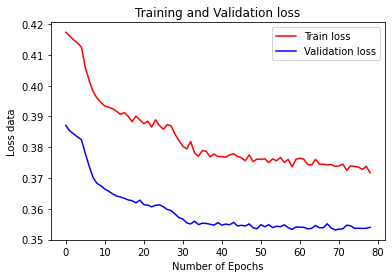

In [63]:
hist_df = pd.DataFrame(hist.history)

plt.plot(hist_df.loc[:, ['loss']], "red", label='Train loss')
plt.plot(hist_df.loc[:, ['val_loss']],"blue", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss data')
plt.legend(loc="best")

plt.show()

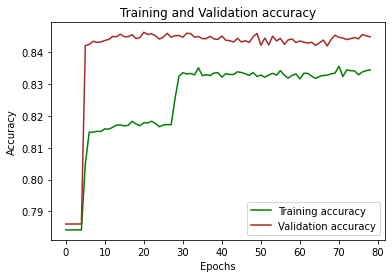

In [70]:
hist_data = pd.DataFrame(hist.history)

plt.plot(hist_data.loc[:, ['accuracy']], "green", label='Training accuracy')
plt.plot(hist_data.loc[:, ['val_accuracy']], "brown", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
# Predicting the test set results
y_prediction = model.predict(X_test)
y_prediction = (y_prediction > 0.5)

<AxesSubplot:>

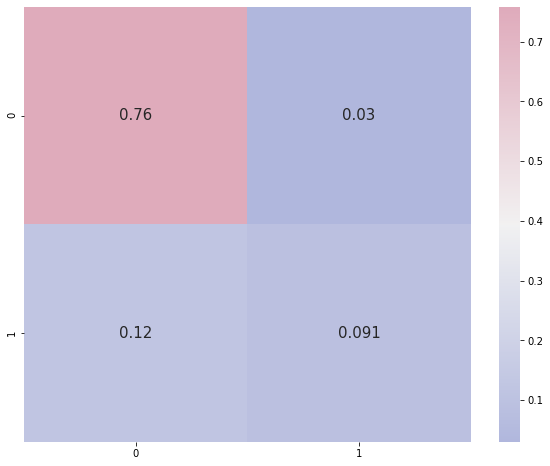

In [68]:
# confusion matrix
confusion_cmap= sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(10,8))
confusion_mat = confusion_matrix(y_test, y_prediction)
sns.heatmap(confusion_mat/np.sum(confusion_mat), cmap = confusion_cmap, annot = True, annot_kws = {'size':15})

In [69]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     20110
           1       0.75      0.43      0.55      5398

    accuracy                           0.85     25508
   macro avg       0.81      0.70      0.73     25508
weighted avg       0.84      0.85      0.83     25508

